# Introduction
The UFC has their own official stat website for all fights they've had which can be found [here](http://www.ufcstats.com/statistics/events/completed). While the data is comprehensive, the data visualisations are rather basic and don't show much data. This can prevent UFC fans from getting a better understanding of a fight, specifically the breakdown of the type of strikes landed and where they landed. A tool that creates better and more detailed visualisations would be beneficial to fans and possibly fighters too. 

For this project I aim to try to be able to create a function that can create visualisations that show breakdowns of the variety of strikes landed in a fight. I then plan on using this data to find any trends and possibly even make predictions based on the number of strikes landed and where they are being landed.

# Dataset
The following [data set](https://www.kaggle.com/datasets/rajeevw/ufcdata/) will be used as it contains comprehensive and detailed information pulled from the official UFC stats website from 1993 to 2021.

# Setup

In [4]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
ufc_data = pd.read_csv("data.csv")

# Pre-processing
My initial aim is to create a visulisation similar to this:
<br><img src="Sample Screenshot.png" width="330" height="300"><br>
This is a screenshot from a YouTube video which can be found [here](https://www.youtube.com/watch?v=TWafkxT699c&t=327s).

This requires me to be able to reduce the dimensionality of the dataset to isolate only the columns that are relevant to what I wish to produce with my model.

In [7]:
# Returning high-level information on dataset
print(ufc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB
None


In [8]:
print(ufc_data.describe())

          B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  \
count  4585.000000   4585.000000        4585.000000            4585.000000   
mean      0.247476      0.176818           0.453310               0.434290   
std       0.378509      0.324633           0.130458               0.132618   
min       0.000000      0.000000           0.000000               0.000000   
25%       0.000000      0.000000           0.376489               0.351045   
50%       0.015625      0.000000           0.450000               0.427500   
75%       0.500000      0.250000           0.527500               0.510000   
max       5.000000      3.000000           1.000000               1.000000   

       B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  \
count   4585.000000       4585.000000    4585.000000        4585.000000   
mean       0.292650          0.268742       0.478884           0.409276   
std        0.273628          0.267178       0.724229           0.653826 

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1)

print(ufc_data.describe())

       B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  \
count    4585.0        4585.0             4585.0                 4585.0   
...         ...           ...                ...                    ...   

       B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  \
count        4585.0            4585.0         4585.0             4585.0   
...             ...               ...            ...                ...   

       B_avg_REV  B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
count     4585.0         4585.0             4585.0                4585.0   
...          ...            ...                ...                   ...   

       B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  B_avg_TOTAL_STR_att  \
count                 4585.0                    4585.0               4585.0   
...                      ...                       ...                  ...   

       B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  \
count                  

## Relevant Columns
The relevant columns that I will likely need are as follows:
- R_fighter (Red fighter name)
- B_fighter (Blue fighter name)
- date (Date fight occurred)
- Winner (Winner of fight (either red or blue))
- KD (Number of knockdowns)
- SIG_STR (No. Significant Strikes Landed)
- SIG_STR_pct (Significant strikes as percentage)
- TOTAL_STR (Total no. strikes landed)
- TD (No. Takedowns)
- TD_pct (Takedown percentages)
- HEAD (No. significant strikes landed to body)
- BODY (No. significant strikes landed to body)
- CLINCH (No. significant strikes landed in clinch)
- GROUND (No. significant strikes landed while on the ground)
- win_by (Method of win)

Now that the relevant columns have been identified, we can begin reducing the dimensionality of the dataset and leave only the columns listed above.

In [208]:
filtered_columns = ['R_fighter', 'B_fighter', 'date', 'Winner',
                    'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_HEAD_landed', 'B_avg_HEAD_att', 'B_avg_BODY_landed', 'B_avg_BODY_att', 'B_avg_LEG_landed', 'B_avg_LEG_att',
                    'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_avg_HEAD_landed', 'R_avg_HEAD_att', 'R_avg_BODY_landed', 'R_avg_BODY_att', 'R_avg_LEG_landed', 'R_avg_LEG_att']

filtered_data = pd.read_csv("data.csv", usecols=filtered_columns)

# Creating the Function
We can now begin creating our functions for creating visualisations.

In [30]:
pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Here we'll create a function where we can find a specific, individual fight and create a data frame for it. For simplicity, we will pass through two fighter names and the date they fought. We pass the date so we can avoid cases of where fighters faced each other multiple times. This function will be used for the rest of our functions later to create the necessary data frame.

In [204]:
def search_fight(rFighter, bFighter, fightDate):
    fight_df = filtered_data[(filtered_data['R_fighter'] == rFighter) & (filtered_data['B_fighter'] == bFighter) & (filtered_data['date'] == fightDate)]

    if len(fight_df) == 0:
        print("No matching row found.")
        return None
    
    return fight_df

Now that we have a function to create a data frame for a specific fight, we can create functions that we can use to create various charts and visualisations. 
The following function will create a bar chart to represent the total strikes landed by both opponents and who the winner of the fight was.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

def create_bart_chart(fight_df):
    # We're taking the fight data frame and creating a new data frame to be used for our charts
    plot_df = pd.DataFrame([(fight_df['R_fighter'].values, int(fight_df['R_avg_TOTAL_STR_landed'].values)),
                            (fight_df['B_fighter'].values, int(fight_df['B_avg_TOTAL_STR_landed'].values))],
                           columns=('Fighter','Total_STR')
    )
    
    # Creating and defining our charts
    plot_df.plot(kind='bar', x='Fighter', y='Total_STR', legend=True, rot=45, color=[(87/255,12/255,17/255), (23/255,48/255,101/255)])
    plt.xlabel('Fighters')
    plt.ylabel('Total Strikes')
    plt.suptitle('Comparison of Average Total Strikes Landed by Red and Blue Fighters', fontsize=14)
    plt.title('Winner: ' + fight_df['Winner'].to_string(), fontsize=12)
    plt.tight_layout()
    plt.show()

Now we'll test the chart with the fight between Adrian Yanez and Gustavo Lopez which took place on March 20th 2021. We'll do this by passing the returned data frame from the **search_fight** function onto the **create_bar_chart** function.

/var/folders/s_/_0znjrhx46g0gd_bqc9l479h0000gn/T/ipykernel_64166/943267457.py:6: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/s_/_0znjrhx46g0gd_bqc9l479h0000gn/T/ipykernel_64166/943267457.py:7: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



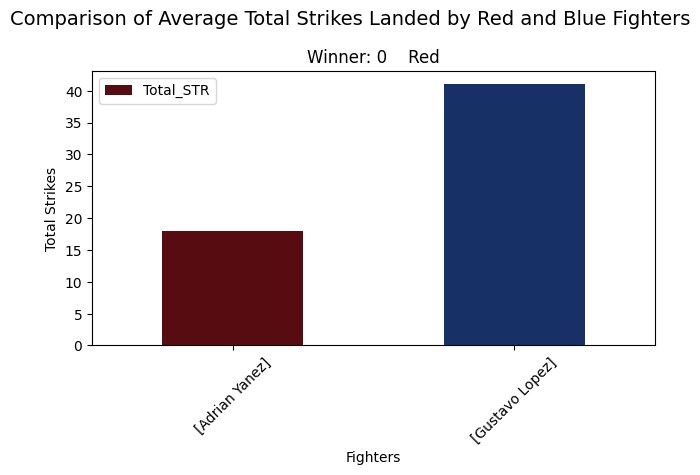

In [207]:
create_bart_chart(search_fight("Adrian Yanez", "Gustavo Lopez", "2021-03-20"))

As we can see from the chart above, we can see that despite Gustavo Lopez throwing significantly more strikes than Adrian Yanez, he still lost the fight. Let's investigate to see how often this occurs and if a pattern can be found.

In [220]:
import math
r_total_wins = 0                # Total wins by red fighter 
b_total_wins = 0                # Total wins by blue fighter
r_more_strikes_count = 0        # Total fights where red fighter has more strikes
b_more_strikes_count = 0        # Total fights where blue fighter has more strikes

# We're taking our filtered_data data frame so there is less data to parse
for row in filtered_data.index:
        r_total_strikes = float(filtered_data['R_avg_TOTAL_STR_landed'][row])
        b_total_strikes = float(filtered_data['B_avg_TOTAL_STR_landed'][row])

        # Checking for NaN
        if not math.isnan(r_total_strikes) or not math.isnan(b_total_strikes):
                winner = filtered_data['Winner'][row]
                if winner == "Red":
                        r_total_wins += 1
                        if r_total_strikes > b_total_strikes:
                                r_more_strikes_count += 1
                elif winner == "Blue":
                        b_total_wins += 1 
                        if r_total_strikes < b_total_strikes:
                                b_more_strikes_count += 1
print("Total of Fights:")
print("Total Red Wins: " + str(r_total_wins))
print("Total Blue Wins: " + str(b_total_wins))
print("Total Fights where Red fighter had more strikes: " + str(r_more_strikes_count))
print("Total Fights where Blue fighter had more strikes: " + str(b_more_strikes_count))

Total of Fights:
Total Red Wins: 3653
Total Blue Wins: 1813
Total Fights where Red fighter had more strikes: 1488
Total Fights where Blue fighter had more strikes: 774


Let's see if we can create a visualisation for the above data so we can see this visually.

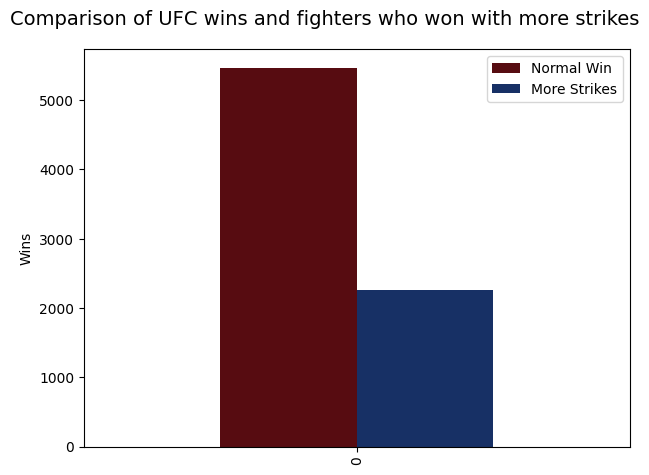

In [238]:
r_total_wins = 3653
b_total_wins = 1813
r_more_strikes_count = 1488 
b_more_strikes_count = 774

total_wins = r_total_wins + b_total_wins
total_more_strikes_wins = r_more_strikes_count + b_more_strikes_count

plot_data = { 'Normal Win': [total_wins], 'More Strikes': [total_more_strikes_wins]}
plot_df = pd.DataFrame(plot_data)

# Creating and defining our charts
plot_df.plot(kind='bar', color=[(87/255,12/255,17/255), (23/255,48/255,101/255),])
plt.ylabel('Wins')
plt.suptitle('Comparison of UFC wins and fighters who won with more strikes', fontsize=14)
plt.tight_layout()
plt.show()

As you can see above, we can visually see how landing more strikes does not result in a higher likelihood of winning a fight which surprised me and goes against my initial hypothesis. However, let's see if we can replicate this trend for fighters who are known to be talented strikers and for having a high velocity of strikes during fights. Two fighters who come to mind that fit this description are:
- Max Holloway
- Colby Covington

We will combine the code of the previous two cells to create a chart for *Max Holloway* first.